In [ ]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 1.76MB/s]


# Bài tập 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
    # your code here
    result = [row[index] for row in data]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [ ]:
X, y = prepare_data('/content/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]) , sum(X[2][:5]) , sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]
[22.1, 10.4, 12.0, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 13.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 17.5, 5.6, 20.5, 9.7, 17.0, 15.0, 20.9, 18.9, 10.5, 21.4, 11.9, 13.2, 17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9, 8.5, 16.1, 10.6, 23.2, 19.8, 9.7, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7, 5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 20.7, 14.0, 16.0, 11.3, 11.0, 13.4, 18.9, 22.3, 18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12.0, 16.0, 12.9, 16.7, 14.0, 7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4, 17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15.0, 7.2, 12.0, 5.3, 19.8, 18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 16.6, 15.2, 19.7, 10.6, 6.6, 11.9, 24.7, 9.7, 1.6, 17.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9, 19.2, 20.1, 10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 16.0, 20.6, 3.2, 15.3, 10.1, 7.3, 12.9, 16.4, 13.3, 19.9, 18.0, 1

# Bài tập 2

In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)

            losses.append(loss)
    return (w1, w2, w3, b, losses)

## 2.1

In [ ]:
# def initialize_params():
#     w1 = random.gauss(mu=0.0, sigma=0.01)
#     w2 = random.gauss(mu=0.0, sigma=0.01)
#     w3 = random.gauss(mu=0.0, sigma=0.01)
#     b = 0
#     return w1, w2, w3, b

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

## 2.2

In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    # your code here
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

In [ ]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


## 2.3

In [ ]:
def compute_loss_mse(y_hat, y):
    # your code here
    loss = (y_hat - y)**2
    return loss

In [ ]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


## 2.4

In [ ]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    # your code here
    dl_db = 2*(y_hat-y)
    return dl_db

In [ ]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [ ]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


## 2.5

In [ ]:
def update_weight_wi(wi, dl_dwi, lr):
    # your code here
    wi = wi - lr*dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

In [ ]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [ ]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


## 2.6

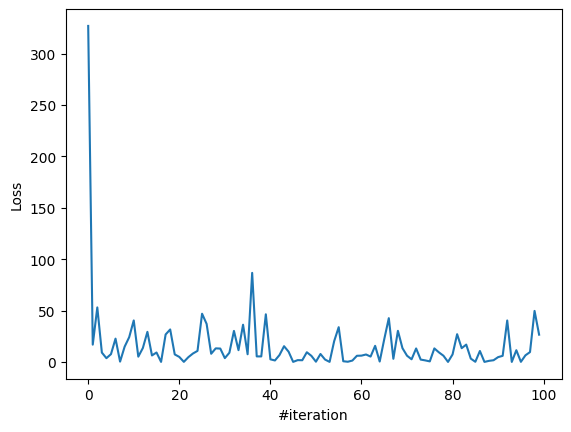

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07464807683656512 0.16066543117892498 0.018243299909893745


In [ ]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is {sales}')

predicted sales is 8.137013339963005


## 2.7

In [ ]:
def compute_loss_mae(y_hat, y):
  return np.abs(y_hat-y)

In [ ]:
l = compute_loss_mae(y_hat =1, y =0.5)
print ( l )

0.5


# Bài tập 3

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # accumulate loss
            # your code here
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2 , w3 , b
            # your code here
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        # your code here
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)

    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

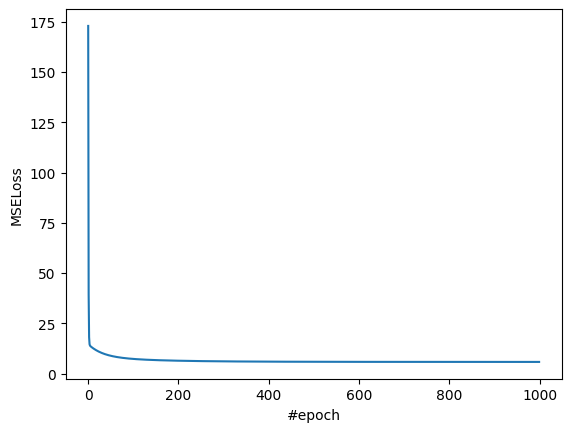

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSELoss")
plt.show()

In [ ]:
X, y = prepare_data('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)

print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

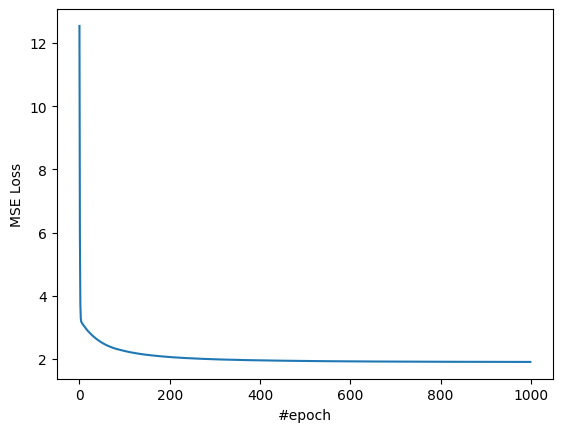

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

# Bài tập 4

In [ ]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1 , x1 , x2 , x3 ] for x1 , x2 , x3 in zip( tv_data , radio_data , newspaper_data)]
    y = sales_data
    return X, y

In [ ]:
def initialize_params () :
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return [bias , w1 , w2 , w3]

In [ ]:
# predict output by using y = x0*b + x1*w1 + x2*w2 + x3*ư3

def predict(X_features, weights):
  # your code here
  result = sum([f*w for f, w in zip(X_features, weights)])
  return result

def compute_loss(y_hat, y):
  return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
  # your code here
  dl_dweights = [2*(y_hat-y)*xi for xi in X_features]
  return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
  # your code here
  weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)]
  return weights

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


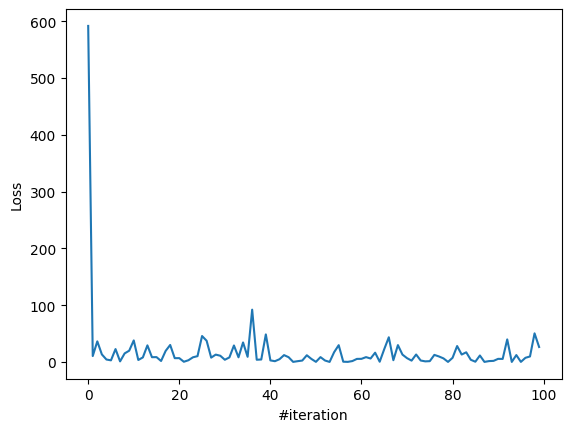

In [ ]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50 , lr=1e-5) :

    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range ( N ) :
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights , losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X , y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr =1e-5)
# Print loss value at iteration 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
